-------------------------

# $\textbf{CHAPTER 05}$ : Dynamic Programming & Linear Algebra.

--------------

# $\bullet$ $\color{red}{\text{TASK}}$ :

## $\bullet$ For given $n\in\mathbb N:$ calculate $x_n$ where $x_{n} = 2x_{n-1} + 2x_{n-2} - x_{n-3}\quad\forall n\ge 3$
## with initial conditions:  
$$\begin{bmatrix}
x_0 \\
x_1 \\
x_2 
\end{bmatrix} = \begin{bmatrix}
1 \\
1 \\
1 
\end{bmatrix}.$$ 

-----------

In [2]:
#traditional way.

def x(n):
    if n in [0,1,2]:
        return 1
    else:
        return 2*x(n-1) + 2*x(n-2) - x(n-3)
n=25
x(n)

4299982849

----------

## $\bullet$ Too slow...
## $T(n) = 2T(n-1)+2T(n-2)-T(n-3) \rightarrow$ $T(n)=\Theta\left(\cfrac{\big(3+\sqrt{5}\big)^n}{2^n}\right)$: NP time.

$\bullet$ Note: $\cfrac{\big(3+\sqrt{5}\big)^n}{2^n}\approx 2.61^n.$

----------

In [3]:
#dynamic programming way.

def X(n):
    A=[1,1,1]
    for i in range(3,n+1):
        A.append(2*A[i-1] + 2*A[i-2] - A[i-3])
    return A[-1]
n=25
X(n)

4299982849

## $\bullet$ Time complexity: $T(n)=\Theta\big(n\big).$

In [4]:
#lets check the speed.
import time

test1 = []
t0 = time.time()
for k in range(30):
    test1.append(x(k))
t1 = time.time()
print('Output: {}\n\nTime needed for the traditional way t = {}'.format(test1,t1-t0))

Output: [1, 1, 1, 3, 7, 19, 49, 129, 337, 883, 2311, 6051, 15841, 41473, 108577, 284259, 744199, 1948339, 5100817, 13354113, 34961521, 91530451, 239629831, 627359043, 1642447297, 4299982849, 11257501249, 29472520899, 77160061447, 202007663443]

Time needed for the traditional way t = 15.062105655670166


In [7]:
test2 = []
t2 = time.time()
for k in range(30+100): #plus 100 more...
    test2.append(X(k))
t3 = time.time()
print('Output: {}\n\nTime needed for the dynamic programming way t = {}'.format(test2[:30],t3-t2))

Output: [1, 1, 1, 3, 7, 19, 49, 129, 337, 883, 2311, 6051, 15841, 41473, 108577, 284259, 744199, 1948339, 5100817, 13354113, 34961521, 91530451, 239629831, 627359043, 1642447297, 4299982849, 11257501249, 29472520899, 77160061447, 202007663443]

Time needed for the dynamic programming way t = 0.0156404972076416


In [32]:
test1==test2 #check the results.

True

-----------------

# $\bullet$ Shut up! and do the $\color{red}{\text{MATHS}}$...

$x_{n} = 2x_{n-1} + 2x_{n-2} - x_{n-3}\quad\forall n\ge 3$  with initial conditions:   $\begin{bmatrix}
x_0 \\
x_1 \\
x_2 
\end{bmatrix} = \begin{bmatrix}
1 \\
1 \\
1 
\end{bmatrix}$ .

$u_n:= \begin{bmatrix}
x_{n+2} \\
x_{n+1} \\
x_{n} 
\end{bmatrix}\Rightarrow u_0 = \begin{bmatrix}
x_{2} \\
x_{1} \\
x_{0} 
\end{bmatrix},\quad u_n = A\cdot u_{n-1}\Rightarrow u_n = 
\begin{bmatrix}
2 & 2 & -1\\
1 & 0 & 0\\
0 & 1 & 0
\end{bmatrix}\cdot u_{n-1}\iff \begin{bmatrix}
x_{n+2} \\
x_{n+1} \\
x_{n} 
\end{bmatrix} = \begin{bmatrix}
2 & 2 & -1\\
1 & 0 & 0\\
0 & 1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{n+1} \\
x_{n+2} \\
x_{n-1} 
\end{bmatrix}.$

Υπολογίζουμε τις ιδιοτιμές του $A:$ 
$$\operatorname{det}{\big(Α-\lambda I\big)}=0\iff \lambda_0 = -1, \lambda_1 =\cfrac{3-\sqrt{5}}{2},\lambda_2 =\cfrac{3+\sqrt{5}}{2}.$$
$$\implies A^n = P\Lambda^n P^{-1}: \Lambda = \begin{bmatrix}
-1 & 0 & 0\\
0 & \cfrac{3-\sqrt{5}}{2} & 0\\
0 & 0 & \cfrac{3+\sqrt{5}}{2}
\end{bmatrix},$$
$$P=\begin{bmatrix}1 & \frac{7}{2} - \frac{3 \sqrt{5}}{2} & \frac{3 \sqrt{5}}{2} + \frac{7}{2}\\-1 & \frac{3}{2} - \frac{\sqrt{5}}{2} & \frac{\sqrt{5}}{2} + \frac{3}{2}\\1 & 1 & 1\end{bmatrix}= \begin{bmatrix}-1 & 3\lambda_1 -1 & 3\lambda_2 -1\\-1 & \lambda_1 & \lambda_2\\1 & 1 & 1\end{bmatrix} , P^{-1} = \begin{bmatrix}\frac{1}{5} & - \frac{3}{5} & \frac{1}{5}\\\frac{-3 + \sqrt{5}}{-20 + 10 \sqrt{5}} & \frac{-1 + \sqrt{5}}{-20 + 10 \sqrt{5}} & - \frac{5}{50 - 25 \sqrt{5}}\\- \frac{1}{10} + \frac{\sqrt{5}}{10} & \frac{3}{10} - \frac{\sqrt{5}}{10} & \frac{2}{5} - \frac{\sqrt{5}}{5}\end{bmatrix}=$$
$$=\begin{bmatrix}\frac{1}{5} & - \frac{3}{5} & \frac{1}{5}\\\frac{λ_{2} + 1}{5 λ_{1} - 5 λ_{2}} & \frac{2 - 3 λ_{2}}{5 λ_{1} - 5 λ_{2}} & \frac{1 - 4 λ_{2}}{5 λ_{1} - 5 λ_{2}}\\\frac{- λ_{1} - 1}{5 λ_{1} - 5 λ_{2}} & \frac{3 λ_{1} - 2}{5 λ_{1} - 5 λ_{2}} & \frac{4 λ_{1} - 1}{5 λ_{1} - 5 λ_{2}}\end{bmatrix}\Rightarrow$$
$\Rightarrow \begin{bmatrix}
x_{n+2} \\
x_{n+1} \\
x_{n} 
\end{bmatrix}  =A^nu_0 = P\Lambda^n P^{-1}u_0,$
$$P^{-1}u_0 = \begin{bmatrix}- \frac{1}{5}\\\frac{-3 + \sqrt{5}}{-20 + 10 \sqrt{5}} + \frac{-1 + \sqrt{5}}{-20 + 10 \sqrt{5}} - \frac{5}{50 - 25 \sqrt{5}}\\\frac{3}{5} - \frac{\sqrt{5}}{5}\end{bmatrix}= \begin{bmatrix}- \frac{1}{5}\\\frac{1 - 4 λ_{2}}{5 λ_{1} - 5 λ_{2}} + \frac{2 - 3 λ_{2}}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2} + 1}{5 λ_{1} - 5 λ_{2}}\\\frac{- λ_{1} - 1}{5 λ_{1} - 5 λ_{2}} + \frac{3 λ_{1} - 2}{5 λ_{1} - 5 λ_{2}} + \frac{4 λ_{1} - 1}{5 λ_{1} - 5 λ_{2}}\end{bmatrix},$$

$$P\Lambda^n = \begin{bmatrix}λ_{0}^{n} & λ_{1}^{n} \left(3 λ_{1} - 1\right) & λ_{2}^{n} \left(3 λ_{2} - 1\right)\\- λ_{0}^{n} & λ_{1} λ_{1}^{n} & λ_{2} λ_{2}^{n}\\λ_{0}^{n} & λ_{1}^{n} & λ_{2}^{n}\end{bmatrix}\Rightarrow$$



$$\implies  u_n = \Big( P\Lambda^n\Big)\cdot\Big(P^{-1}u_0\Big)=  \begin{bmatrix}- \frac{λ_{0}^{n}}{5} + \frac{λ_{1}^{n} \left(1 - 4 λ_{2}\right) \left(3 λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1}^{n} \left(2 - 3 λ_{2}\right) \left(3 λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1}^{n} \left(3 λ_{1} - 1\right) \left(λ_{2} + 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(- λ_{1} - 1\right) \left(3 λ_{2} - 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(3 λ_{1} - 2\right) \left(3 λ_{2} - 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(4 λ_{1} - 1\right) \left(3 λ_{2} - 1\right)}{5 λ_{1} - 5 λ_{2}}\\\frac{λ_{0}^{n}}{5} + \frac{λ_{1} λ_{1}^{n} \left(1 - 4 λ_{2}\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1} λ_{1}^{n} \left(2 - 3 λ_{2}\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1} λ_{1}^{n} \left(λ_{2} + 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2} λ_{2}^{n} \left(- λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2} λ_{2}^{n} \left(3 λ_{1} - 2\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2} λ_{2}^{n} \left(4 λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}}\\- \frac{λ_{0}^{n}}{5} + \frac{λ_{1}^{n} \left(1 - 4 λ_{2}\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1}^{n} \left(2 - 3 λ_{2}\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1}^{n} \left(λ_{2} + 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(- λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(3 λ_{1} - 2\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(4 λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}}\end{bmatrix}$$

$$\implies \color{red}{x_n} = - \frac{λ_{0}^{n}}{5} + \frac{λ_{1}^{n} \left(1 - 4 λ_{2}\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1}^{n} \left(2 - 3 λ_{2}\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{1}^{n} \left(λ_{2} + 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(- λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(3 λ_{1} - 2\right)}{5 λ_{1} - 5 λ_{2}} + \frac{λ_{2}^{n} \left(4 λ_{1} - 1\right)}{5 λ_{1} - 5 λ_{2}} = $$

$$=- \frac{(-1)^{n}}{5} + \frac{λ_{1}^{n} \left(-3 + \sqrt{5}\right)}{-20 + 10 \sqrt{5}} + \frac{λ_{1}^{n} \left(-1 + \sqrt{5}\right)}{-20 + 10 \sqrt{5}} - \frac{ λ_{1}^{n}}{10 - 5 \sqrt{5}} + λ_{2}^{n} \left(\frac{2}{5} - \frac{\sqrt{5}}{5}\right) + λ_{2}^{n} \left(\frac{3}{10} - \frac{\sqrt{5}}{10}\right) + λ_{2}^{n} \left(- \frac{1}{10} + \frac{\sqrt{5}}{10}\right)=$$

$$=\lambda_1^n\left[ \cfrac{-3+\sqrt{5}-1+\sqrt{5}+2 }{10\sqrt{5}-20}\right]+\lambda_2^n\left[ \cfrac{4-2\sqrt{5}+3-\sqrt{5}-1+\sqrt{5} }{10}\right] +\cfrac{(-1)^{n+1}}{5}=$$

$$=\lambda_1^n\left[\cfrac{\sqrt{5}-1}{5\big(\sqrt{5}-2\big)}\right] +\lambda_2^n\left[\cfrac{3-\sqrt{5}}{5}\right]+\cfrac{(-1)^{n+1}}{5} = \cfrac{2}{5}\lambda_1^n\cdot\lambda_2 + \cfrac{2}{5}\lambda_2^n\cdot\lambda_1 + \cfrac{(-1)^{n+1}}{5}=$$

$$= \fbox{$\cfrac{2}{5}\Bigg(\lambda_1^n\cdot\lambda_2 + \lambda_2^n\cdot\lambda_1 + \cfrac{(-1)^{n+1}}{2}\Bigg)$}$$

$$\implies \fbox{$\lim_{n\to\infty}\cfrac{x_{n+1}}{x_n}=\lambda_2 = \cfrac{3+\sqrt{5}}{2}$}.$$

-----------------

In [42]:
#check the limit.
from numpy import sqrt

In [102]:
el_1= (3-sqrt(5))/2; el_2=(3+sqrt(5))/2
n=500


xn1 = el_1**(n+1) *el_2 +el_2**(n+1) *l1 + 0.5*((-1)**(n+2))
xn = el_1**n *el_2 +el_2**n *el_1 + 0.5*((-1)**(n+1))

xn1/xn


2.6180339887498953

In [103]:
el_2

2.618033988749895

In [104]:
epsilon = 10**(-15) #0.000...01.
abs(l2-xn1/xn) < epsilon

True

In [105]:
#define x(n) without recursive method.
from sympy.abc import n

X_n = lambda n: (2/5)*(el_1**n *el_2 +el_2**n *el_1 + (((-1)**(n+1))/2))
X_n(n)

0.2*(-1)**(n + 1) + 1.04721359549996*0.381966011250105**n + 0.152786404500042*2.61803398874989**n

In [106]:
error = 0.0001
list_of_x_n = [(f'x_{k}',int(X_n(k) + error)) for k in range(35)]

dict(list_of_x_n)


{'x_0': 1,
 'x_1': 1,
 'x_2': 1,
 'x_3': 3,
 'x_4': 7,
 'x_5': 19,
 'x_6': 49,
 'x_7': 129,
 'x_8': 337,
 'x_9': 883,
 'x_10': 2311,
 'x_11': 6051,
 'x_12': 15841,
 'x_13': 41473,
 'x_14': 108577,
 'x_15': 284259,
 'x_16': 744199,
 'x_17': 1948339,
 'x_18': 5100817,
 'x_19': 13354113,
 'x_20': 34961521,
 'x_21': 91530451,
 'x_22': 239629831,
 'x_23': 627359043,
 'x_24': 1642447297,
 'x_25': 4299982849,
 'x_26': 11257501249,
 'x_27': 29472520899,
 'x_28': 77160061447,
 'x_29': 202007663443,
 'x_30': 528862928881,
 'x_31': 1384581123201,
 'x_32': 3624880440721,
 'x_33': 9490060198963,
 'x_34': 24845300156167}

In [107]:
[X(k) for k in range(35)] == list(dict(list_of_x_n).values())  #check the result.

True

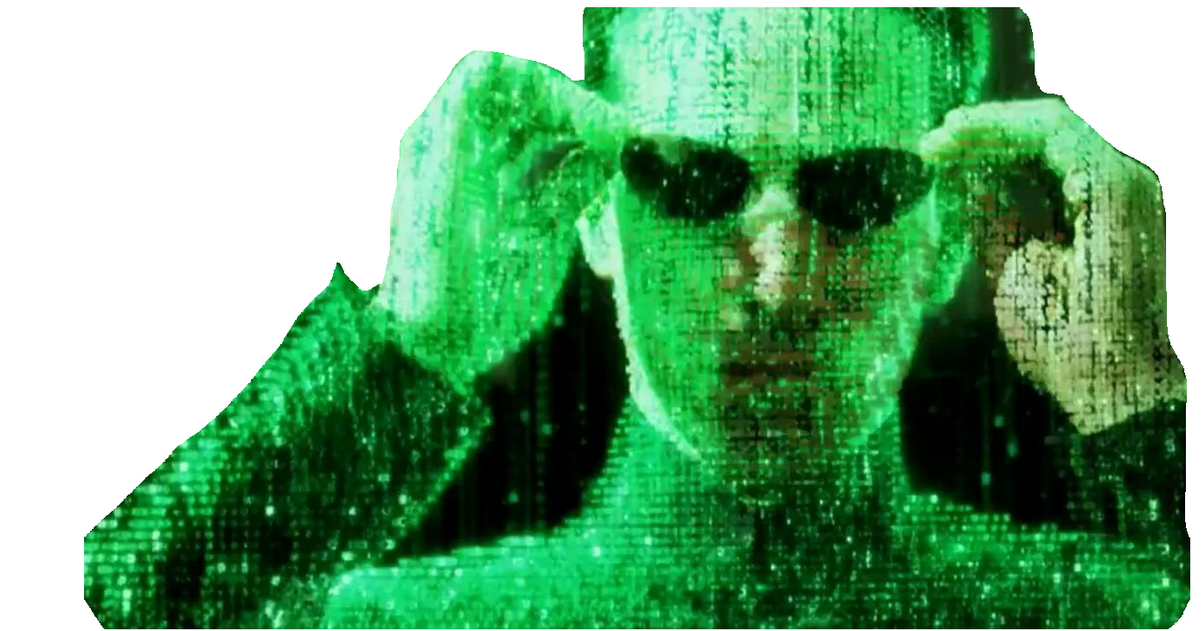

In [60]:
#FUN FACT! java way:



`

package com.company;

import java.sql.Array;

public class Main {

    public static void main(String[] args) {
        System.out.println(x(20));  //traditional. method.
        System.out.println(X(20)); //dp. method.
    }

    public static int x(int n) {
        if (n==0 || n==1 || n==2) {
            return 1;
        }
        else {
            return 2*x(n-1) + 2*x(n-2) - x(n-3);  //too slow...
        }
    }

    public static  int X(int n) {
        int[] A = new int[n+1];
        A[0] = A[1] = A[2] =1;
        for (int i = 3; i < n+1; i++) {
            A[i] = 2*A[i-1] + 2*A[i-2] - A[i-3];
        }
        int Output = A[A.length -1];
        return Output;    //Linear time.
    }
}

`
